# Project: Investigate The TMDb Movie Data Set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this Report, we are going to investigate the TMDb movie data set. The data set contains important information about 10,000 movies most notably: Popularity, Budget, Revenue, genre, vote count and director.

> Based on these questions, we're going to ask the following questions and answer them at the end:<br>
    1- Which director makes the highest vote average.<br>
    2- Do high, or low budget movies get the highest vote average?<br>
    3- What genre is most popular?<br>
    4- Do longer movies get a higher vote average ?<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
df.shape

(10866, 21)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df[df['budget']==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.0,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.000000e+00
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.0,2.150550e+08
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.000000e+00
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.000000e+00


In [8]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
df.duplicated().sum()

1

## Potential Issues:
 1- Non-relavent columns: id, imdb_id, homepage, tagline (taglines usually affect how many people watch the movie and that is not provided in the datalist.)
    , overview, keywords(too specific.), release_date(since release_date will suffer from Y2K, i decided to go with release_year only).<br><br>
 2- Multi value cells: cast, keywords, genres, production_companies. this will be dealt with later on.<br><br>
 3- Nulls.<br><br>
 4- Duplicates.<br><br>
 5- dropping 0 budget and revenue movies. (not realistic and will affect results)<br><br>

## Data Cleaning 
### 1-Dropping unnecessary columns

In [10]:
df.drop(columns=['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'keywords', 'release_date'], inplace=True)
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09


### 2-Dropping nulls

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### 3-Dropping duplicates

In [12]:
## 4
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### 4-Dropping 0 Budget and 0 revenue.

In [13]:
## 5
df = df[df['budget']!=0]
df.reset_index(drop=True,inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
df = df[df['revenue']!=0]
df.reset_index(drop=True,inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:
df.shape
## it seems like we dropped about 7000 entries.

(3805, 14)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which director makes the highest vote average.)

In [16]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03
mean,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172,4.471977e+07,1.387159e+08
std,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616,4.488697e+07,2.169973e+08
min,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07
50%,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07
75%,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


Text(0,0.5,'Vote Average')

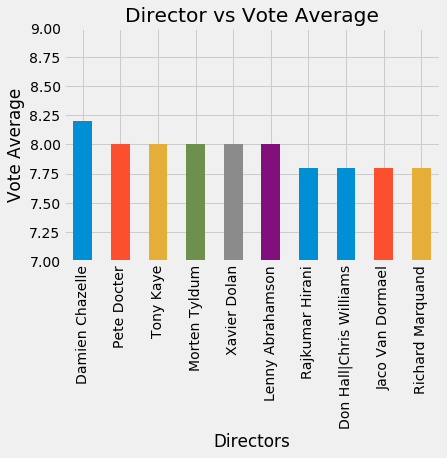

In [17]:
plt.style.use('fivethirtyeight')
numbers = df.groupby('director')['vote_average'].mean().sort_values(ascending=False)
numbers[:10].plot(kind='bar',ylim=[7,9],title="Director vs Vote Average")
plt.xlabel("Directors")
plt.ylabel("Vote Average")

In [18]:
##Lets check what movies did damien chazelle produce.
df[df['director'] == 'Damien Chazelle']

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
181,4.780419,3300000,13993093,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,105,Drama|Music,Bold Films|Blumhouse Productions|Right of Way ...,2372,8.2,2014,3.039600e+06,1.288891e+07


### Research Question 2  (Do high, or low budget movies get the highest vote average?)

In [19]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3805.000000,3.805000e+03,3.805000e+03,3805.000000,3805.000000,3805.000000,3805.000000,3.805000e+03,3.805000e+03
mean,1.203784,3.760800e+07,1.089734e+08,109.351117,534.159001,6.170565,2001.229172,4.471977e+07,1.387159e+08
std,1.480569,4.232179e+07,1.772976e+08,19.845678,883.757588,0.792437,11.329616,4.488697e+07,2.169973e+08
min,0.010335,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.470651,1.000000e+07,1.433379e+07,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.925371e+07
50%,0.810805,2.500000e+07,4.621664e+07,106.000000,209.000000,6.200000,2004.000000,3.038360e+07,6.284688e+07
75%,1.387163,5.000000e+07,1.260695e+08,119.000000,584.000000,6.700000,2010.000000,6.084153e+07,1.658054e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


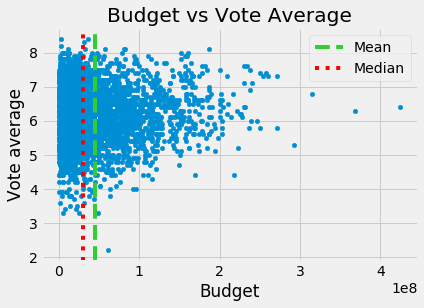

In [20]:
df.plot(kind='scatter', x='budget_adj', y='vote_average',title='Budget vs Vote Average')
plt.xlabel('Budget')
plt.ylabel('Vote average')
mean_line = plt.axvline(df['budget_adj'].mean(), color='#32CD32', linestyle='--')
median_line = plt.axvline(df['budget_adj'].median(), color='r', linestyle=':')
plt.legend((mean_line, median_line), ('Mean', 'Median'))

We can see (based on the scatterplot) that low budget movies can get high or low votes.<br> <br>
(we also learned that most movies in this data set are relatively low budget.)<br><br>
Lets compare high and low budget and see their vote average.

In [21]:
## mark movies with budget highier than the mean (High) and movies with lower budget than the mean (Low)
df_high = df.query('budget_adj >= budget_adj.mean()')
df_low = df.query('budget_adj < budget_adj.mean()')
a = ['high']
high = np.repeat(a,df_high['budget'].count())
a = ['low']
low = np.repeat(a,df_low['budget'].count())

In [22]:
df_high['budget_level'] = high
df_high.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_level
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,high
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,high
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,high
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,high
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,high


In [23]:
df_low['budget_level'] = low
df_low.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_level
12,6.118847,15000000,36869414,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,2854,7.6,2015,1.379999e+07,3.391985e+07,low
15,5.898400,44000000,155760117,The Hateful Eight,Samuel L. Jackson|Kurt Russell|Jennifer Jason ...,Quentin Tarantino,167,Crime|Drama|Mystery|Western,Double Feature Films|The Weinstein Company|Fil...,2389,7.4,2015,4.047998e+07,1.432992e+08,low
16,5.749758,48000000,325771424,Taken 3,Liam Neeson|Forest Whitaker|Maggie Grace|Famke...,Olivier Megaton,109,Crime|Action|Thriller,Twentieth Century Fox Film Corporation|M6 Film...,1578,6.1,2015,4.415998e+07,2.997096e+08,low
21,5.337064,30000000,91709827,Southpaw,Jake Gyllenhaal|Rachel McAdams|Forest Whitaker...,Antoine Fuqua,123,Action|Drama,Escape Artists|Riche-Ludwig Productions,1386,7.3,2015,2.759999e+07,8.437300e+07,low
23,4.710402,40000000,569651467,Fifty Shades of Grey,Dakota Johnson|Jamie Dornan|Jennifer Ehle|Eloi...,Sam Taylor-Johnson,125,Drama|Romance,Focus Features|Trigger Street Productions|Mich...,1865,5.3,2015,3.679998e+07,5.240791e+08,low


In [24]:
merged = df_high.append(df_low, sort = False)
merged.groupby('budget_level')['vote_average'].mean()

budget_level
high    6.158209
low     6.177282
Name: vote_average, dtype: float64

Text(0,0.5,'Vote Average')

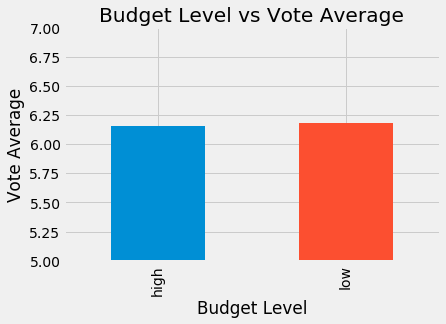

In [25]:
numbers = merged.groupby('budget_level')['vote_average'].mean()
numbers.plot(kind='bar', ylim = [5,7], title="Budget Level vs Vote Average")
plt.xlabel("Budget Level")
plt.ylabel("Vote Average")
##contrary to popular belief, higher budget does not corolate to higher votes.

### Research Question 3  (What genre is most popular?)

In [26]:
df.head()
temp = df['genres'].apply(lambda x: x.split("|"))
##take each genre from the list of lists and put them in a single list, then in a dataframe
df_genres = pd.DataFrame(list(x for l in temp for x in l),columns = ['genre'])
df_genres['genre'].value_counts()

Drama              1729
Comedy             1335
Thriller           1194
Action             1076
Adventure           743
Romance             658
Crime               649
Science Fiction     517
Horror              459
Family              417
Fantasy             395
Mystery             343
Animation           199
Music               131
History             128
War                 119
Western              52
Documentary          26
Foreign               9
TV Movie              1
Name: genre, dtype: int64

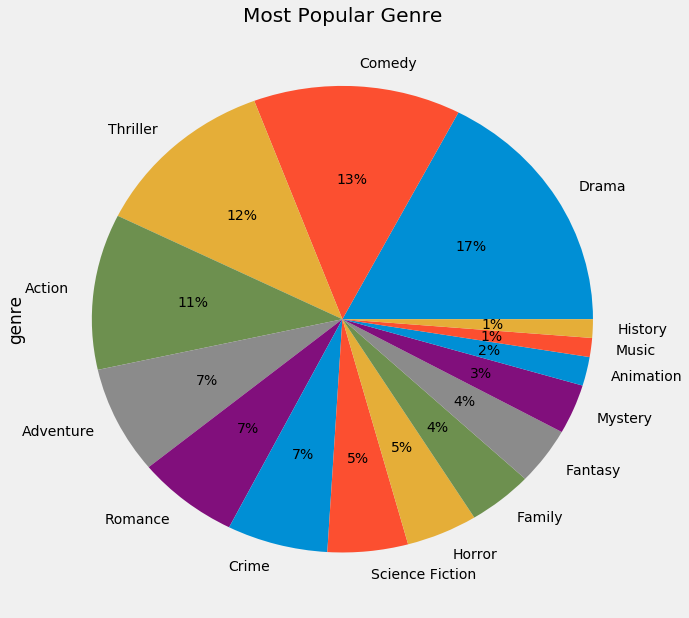

In [27]:
df_genres['genre'].value_counts()[:15].plot(kind='pie',autopct='%1.0f%%',figsize=[10,10],title="Most Popular Genre")

### Research Question 4  (Do longer movies get a higher vote average ?)

In [28]:
## 4- Do longer movies get a higher vote average ?
df['runtime'].describe()

count    3805.000000
mean      109.351117
std        19.845678
min        15.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

In [29]:
df_long = df.query('runtime >= runtime.mean()')
df_short = df.query('runtime < runtime.mean()')
a = ['long']
long = np.repeat(a,df_long['runtime'].count())
a = ['short']
short = np.repeat(a,df_short['runtime'].count())

In [30]:
df_long['runtime_level'] = long
df_long.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,runtime_level
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,long
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,long
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,long
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,long
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,long


In [31]:
df_short['runtime_level'] = short
df_short.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,runtime_level
8,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2893,6.5,2015,6.807997e+07,1.064192e+09,short
9,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,3935,8.0,2015,1.609999e+08,7.854116e+08,short
12,6.118847,15000000,36869414,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,2854,7.6,2015,1.379999e+07,3.391985e+07,short
13,5.984995,88000000,243637091,Pixels,Adam Sandler|Michelle Monaghan|Peter Dinklage|...,Chris Columbus,105,Action|Comedy|Science Fiction,Columbia Pictures|Happy Madison Productions,1575,5.8,2015,8.095996e+07,2.241460e+08,short
16,5.749758,48000000,325771424,Taken 3,Liam Neeson|Forest Whitaker|Maggie Grace|Famke...,Olivier Megaton,109,Crime|Action|Thriller,Twentieth Century Fox Film Corporation|M6 Film...,1578,6.1,2015,4.415998e+07,2.997096e+08,short


In [32]:
merged = df_long.append(df_short, sort = False)
merged.groupby('runtime_level')['vote_average'].mean()

runtime_level
long     6.474778
short    5.955007
Name: vote_average, dtype: float64

In [33]:
## subtract high from low to see the difference in vote averages.
merged.groupby('runtime_level')['vote_average'].mean()[0] - merged.groupby('runtime_level')['vote_average'].mean()[1]

0.51977146473487323

Text(0,0.5,'Vote Average')

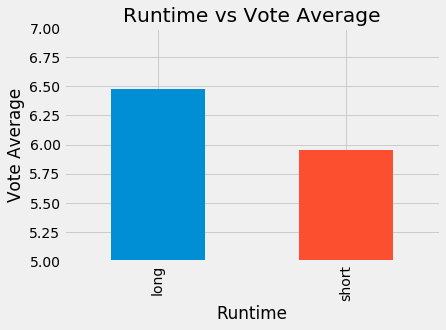

In [34]:
numbers = merged.groupby('runtime_level')['vote_average'].mean()
numbers.plot(kind='bar', ylim = [5,7], title= "Runtime vs Vote Average")
plt.xlabel("Runtime")
plt.ylabel('Vote Average')

### Based on the graph, it seems like the longer a movie is, it more likely will recieve a highier vote.

<a id='conclusions'></a>
## Conclusions

We have explored this data set to answer the following questions:<br>
    1- Which director makes the highest vote average. <br>
    2- Do high, or low budget movies get the highest vote average?<br>
    3- What genre is most popular?<br>
    4- Do longer movies get a higher vote average ?<br><br>
And based on my intuition, we find the following:<br>
    1- The best directors in the industry based on this dataset are Damien Chazelle, Pete Docter and Tony Kaye<br>
    2- There is no correlation between the budget of a movie and the vote average it gets.<br>
    3- The most popular genres of movies through time are Drama, comedy and thriller.<br>
    4- Longer movies corrolate to Highier vote average.<br>
    
## Limitations

Some of the limitations that hidnered my analysis are:<br>
    1-The sample size was too small since we had to drop about two thirds of the dataset duo to nulls, duplicates and bad   values<br>
    2-Insufficient information about the movies, some of the things that we wanted to know are: Who is the star of the movie and how do they impact sales and votes.<br>
    3- there were too many outliers in the Popularity column which is why it wasn't used, the %25 is 0.207583 and min is 0.000065<br>

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0